In [1]:
import gc 
import numpy as np 
from joblib import Parallel, delayed
import matplotlib.pyplot as plt 

Consider an nxn matrix A where each element is uniformly randomly populated with either a zero or 1. What is the probability this randomly po;ulated matrix is invertible? If $n = 1$ this is straightforward: $50 \%$. But this quickly becomes a nuanced problem as $n\rightarrow \infty$. 

Let's consider $n=2$ for the matrix $A$ defined below. Since each of the $4$ entries can either be $0$ or $1$, there are $2^4=16$ possible forms the matrix can take. We know a matrix is invertible $iff$ its determinant is non-zero. Thus, we o determine if 

$$
A=
\begin{bmatrix}
a & b\\
c & d
\end{bmatrix} a, b, c, d \in \{0, 1\}$$

$$det(A) = 0 \Rightarrow ad-bc=0 \Rightarrow ad=bc$$

In [2]:
class Experiment: 
    def __init__(self, n = 2, num_trials = 10_000): 
        self.n = n 
        self.num_trials = num_trials

    def is_invertible(self, matrix: np.array): 
        return not np.allclose(0, np.linalg.det(matrix))
    
    def trial(self): 
        result = 0 
        matrix = np.random.randint(0, 2, size = (self.n, self.n))
        if self.is_invertible(matrix): 
            result = 1
        del matrix
        gc.collect() 
        return result 
    
    def run(self, n_jobs = -1):
        self.simulation_results = Parallel(n_jobs = n_jobs)(delayed(self.trial)() for _ in range(self.num_trials)) 
        self.percentage = sum(self.simulation_results) / self.num_trials

In [3]:
experiment_results = []
for n in range(1, 21): 
    e = Experiment(n = n, num_trials = 10_000)
    e.run()
    experiment_results.append((n, e.percentage))

In [4]:
x, y = zip(*experiment_results)

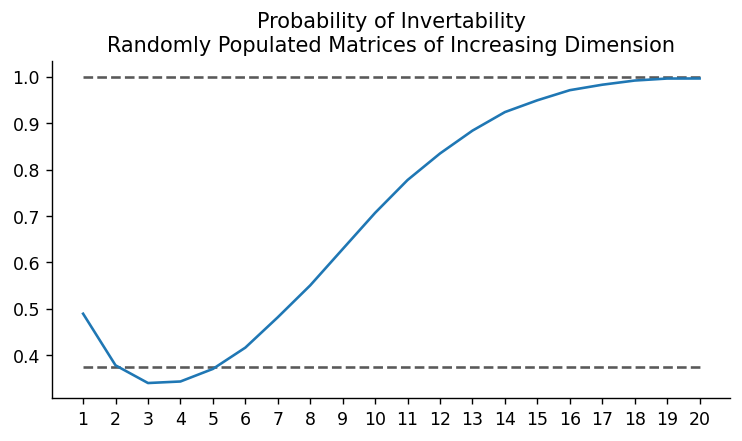

In [28]:
plt.figure(dpi = 125, figsize = (7, 3.5))
ax = plt.subplot(111)
ax.plot(x, 20*[1], "k--", alpha = 0.65)
ax.plot(x, 20*[0.375], "k--", alpha = 0.65)
ax.plot(x, y)
ax.spines[['right', 'top']].set_visible(False)
plt.xticks(np.arange(1, 21, 1.0))
plt.title("Probability of Invertability\nRandomly Populated Matrices of Increasing Dimension")
plt.show()